## Testing a Network


Export your own models or use these ([densely connected](https://drive.google.com/file/d/1Lh52SRvSWSpKbOllblVDJnXnMwhPgBhZ/view?usp=sharing) and [convolutional](https://drive.google.com/file/d/1ko2XkaPHaQ6IS6JHF_ydSVZAxGIo1Qm6/view?usp=sharing)) to see some of these concepts demonstrated.

Download [this](https://drive.google.com/file/d/1FDcz90j6a2adGd8eL0srRhIiIVcHsVoo/view?usp=sharing) image to run the test.


You can also look at the example code at the end of this file for some hints for how to do different tests.

In [3]:
from keras.preprocessing import image
from PIL import Image,ImageChops 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load in the original data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("MNIST data loaded")

# This will work for the models if you download them from the links above. 
# If you want to export your own models, use the name of them here instead. 
model_1 = tf.keras.models.load_model('my_model.h5')
# model_2 = tf.keras.models.load_model('cnn_model.h5')

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

def predict_image(model, x):
    x = x.astype('float32')
    x = x / 255.0

    x = np.expand_dims(x, axis=0)

    image_predict = model.predict(x, verbose=0)
    print("Predicted Label: ", np.argmax(image_predict))

    plt.imshow(np.squeeze(x))
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # uncomment this like if you want to see the array of predictions
    # print(image_predict)
    return image_predict


def plot_value_array(predictions_array, true_label, h):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([(-1*h), h])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()




MNIST data loaded


Follow the instructions to run a prediction in the cell below

<details>
<summary>Final code: </summary>

```
path = "test3w.jpg"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)
```
</details>

Predicted Label:  4


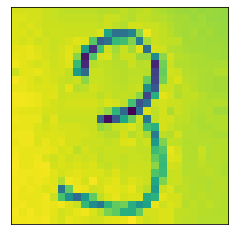

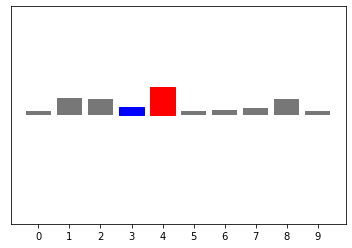

In [4]:
path = "test3w.jpg"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)

## Test 1

Download any of [these](https://drive.google.com/drive/folders/1P1p161W5SSt2wFh7W3Z7-6gFVsv7kVsW?usp=sharing) images. Run them through a convolutional network and a densely connected one. 

What differences do you notice about the output? Why do you think that is? What about a different image? 

Predicted Label:  1


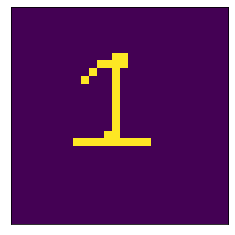

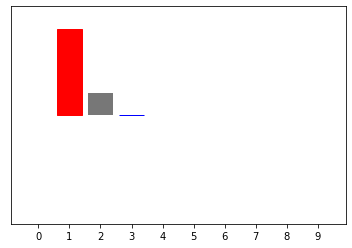

In [5]:
path = "number 1.png"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)

## Test 2

Try using numpy to create an array of random numbers to mirror pixels (0 to 255). Feed that into the model to see what predictions it makes. 

What does the network do with it? Does it have a prediction? This can help you understand what kinds of bias your network might have. 

Try 10 random generated arrays. Can you notice a trend? What about with 100? 


In [10]:
rand=np.random.randint(256, size=(28,28))

In [11]:
path = "test"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa7 in position 0: invalid start byte

## Test 3

Download an image with more than one digit in it. 

What can you learn about the network from it? What if you change the numbers? or the position of the number in the image? 

Predicted Label:  9


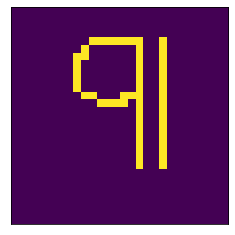

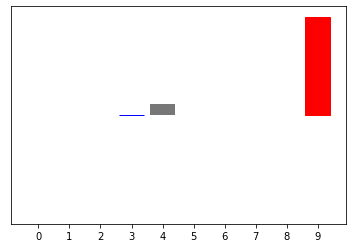

In [5]:
path = "number 91.png"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)

##Test 4

You can also call images from the test or train datasets. Run some images from the original data through your networks. Look at the graph and compare how the networks operate on data that they are accostomed to. 

What does the output look like for these images? Can you write code to have it predict 10 random images? 



Predicted Label:  7


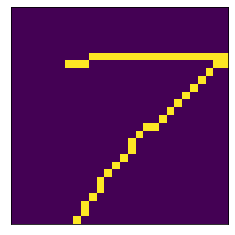

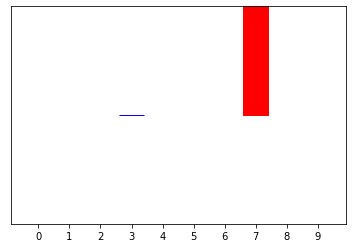

In [6]:
path = "test4.png"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(model_1,  img_arr)
plot_value_array(arr, 3, 1)

# New Section

<details>
<summary>Example code: </summary>

```
# Code to load an image called 'test3w.jpg'
# To use a different image upload it and change the name here.
path = "test3w.jpg"
img = image.load_img(path, target_size=(28,28), color_mode = "grayscale")
x = image.img_to_array(img)
true_label = 3

# Predicting the label using model_1.
p_arr = predict_image(model_1, x)
# This will plot the values on a graph. The last argument is the height of the y-axis.
plot_value_array(p_arr, true_label, 1)

# Displaying the 100th image from the original dataset
plot_image(test_images, 100, test_labels)

# Predicting the label using model_1 on an image from test_images
img_loc = 100
img = test_images[img_loc]
x = image.img_to_array(img)
p_arr = predict_image(model_1, x)
true_label = test_labels[img_loc]
plot_value_array(p_arr, true_label, 1)

# Create an array of random numbers from 0 to 255 of size (28, 28, 1)
x = np.random.randint(0, 255, (28, 28, 1) )

```
</details>
